In [42]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

In [43]:
df = pd.read_csv("../data/AmesHousing.csv")

In [44]:
df.head(10)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
6,7,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
7,8,527145080,120,RL,43.0,5005,Pave,NaN,IR1,HLS,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500
8,9,527146030,120,RL,39.0,5389,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,236500
9,10,527162130,60,RL,60.0,7500,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,189000


In [45]:
df.head

<bound method NDFrame.head of       Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0         1  526301100           20        RL         141.0     31770   Pave   
1         2  526350040           20        RH          80.0     11622   Pave   
2         3  526351010           20        RL          81.0     14267   Pave   
3         4  526353030           20        RL          93.0     11160   Pave   
4         5  527105010           60        RL          74.0     13830   Pave   
...     ...        ...          ...       ...           ...       ...    ...   
2925   2926  923275080           80        RL          37.0      7937   Pave   
2926   2927  923276100           20        RL           NaN      8885   Pave   
2927   2928  923400125           85        RL          62.0     10441   Pave   
2928   2929  924100070           20        RL          77.0     10010   Pave   
2929   2930  924151050           60        RL          74.0      9627   Pave   

     Alle

In [46]:
df.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

ON VOIT BCP de colonne , un tri des colonnes semble être utile ainsi que un test de correlation , NOVA etc .
Déjà si il n'y a pas de garage les autre colonne seront nulles .

<Axes: xlabel='SalePrice', ylabel='Count'>

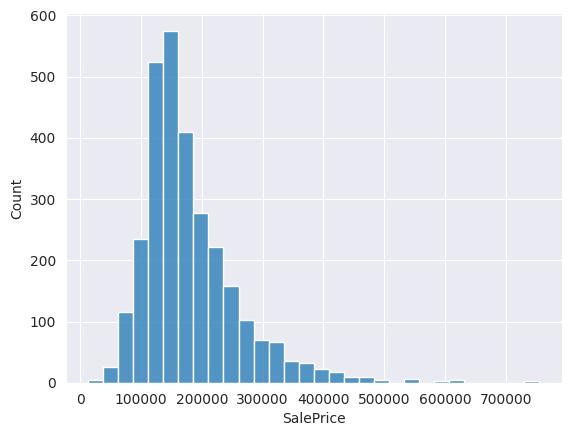

In [47]:
sns.histplot(df["SalePrice"],bins=30)

il faut que l'on voit si cette répartition est bonne ou pas pour un entrainement , normalement pour une regression des valeurs bien reparti de type normal serait convenable .

In [48]:
df["SalePrice"].mean()

180796.0600682594

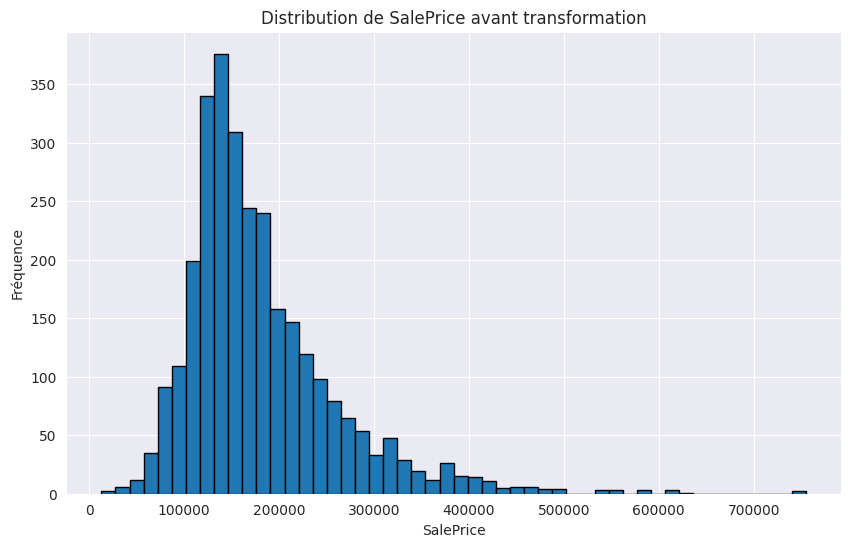

In [49]:
plt.figure(figsize=(10, 6))
plt.hist(df['SalePrice'], bins=50, edgecolor='k')
plt.xlabel('SalePrice')
plt.ylabel('Fréquence')
plt.title('Distribution de SalePrice avant transformation')
plt.show()


In [50]:
df['LogSalePrice'] = np.log(df['SalePrice'])


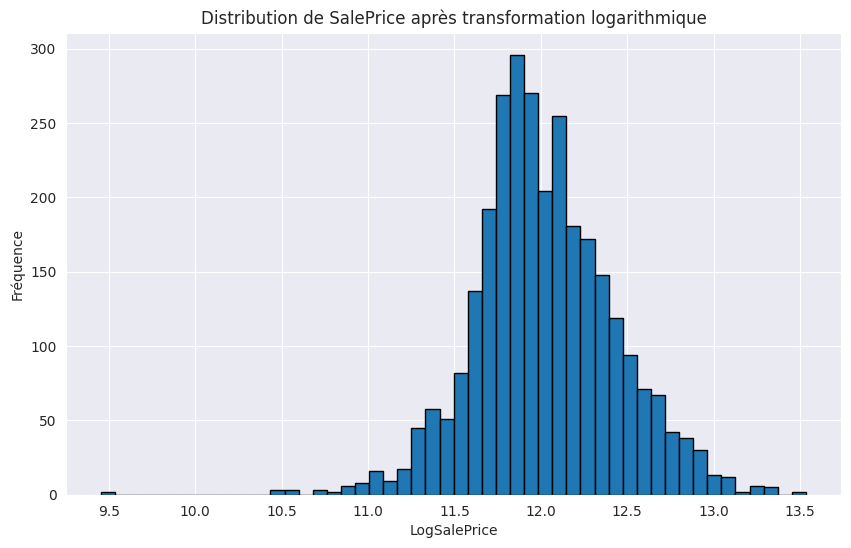

In [51]:
plt.figure(figsize=(10, 6))
plt.hist(df['LogSalePrice'], bins=50, edgecolor='k')
plt.xlabel('LogSalePrice')
plt.ylabel('Fréquence')
plt.title('Distribution de SalePrice après transformation logarithmique')
plt.show()


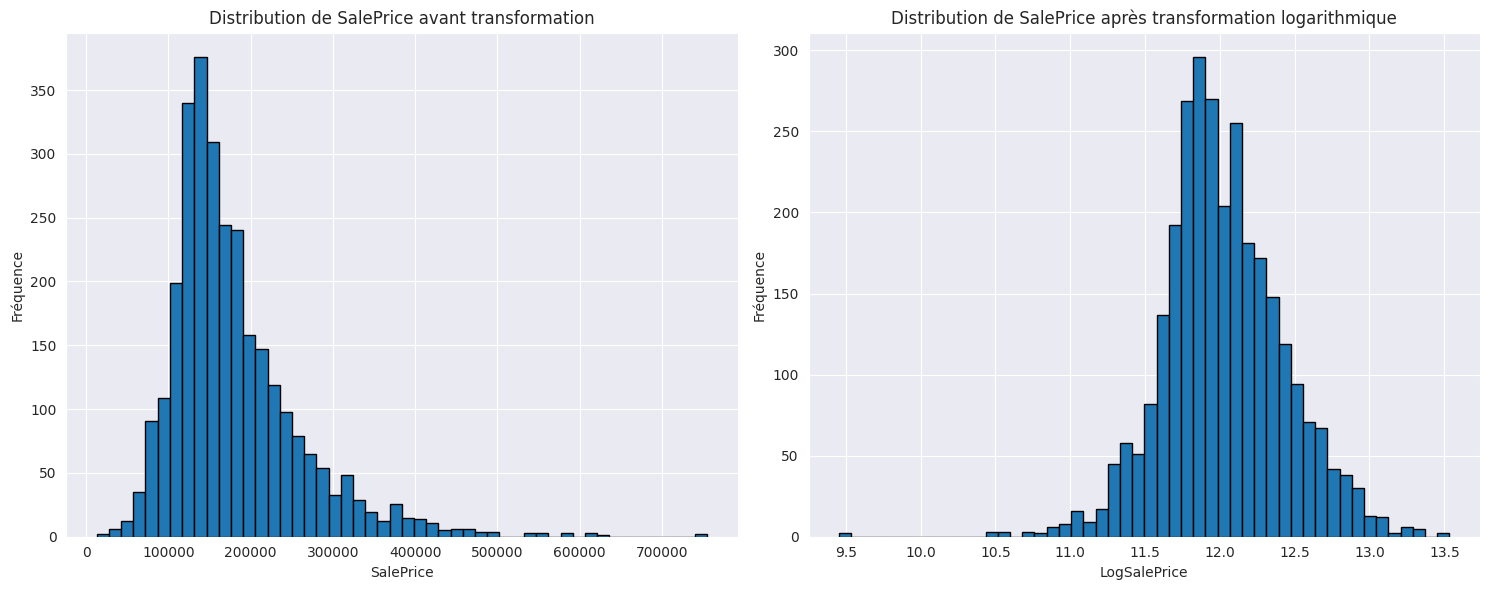

In [52]:
plt.figure(figsize=(15, 6))

# Distribution avant transformation
plt.subplot(1, 2, 1)
plt.hist(df['SalePrice'], bins=50, edgecolor='k')
plt.xlabel('SalePrice')
plt.ylabel('Fréquence')
plt.title('Distribution de SalePrice avant transformation')

# Distribution après transformation logarithmique
plt.subplot(1, 2, 2)
plt.hist(df['LogSalePrice'], bins=50, edgecolor='k')
plt.xlabel('LogSalePrice')
plt.ylabel('Fréquence')
plt.title('Distribution de SalePrice après transformation logarithmique')

plt.tight_layout()
plt.show()


In [53]:
df['SquaredLogSalePrice'] = np.log(df['SalePrice']) ** 2


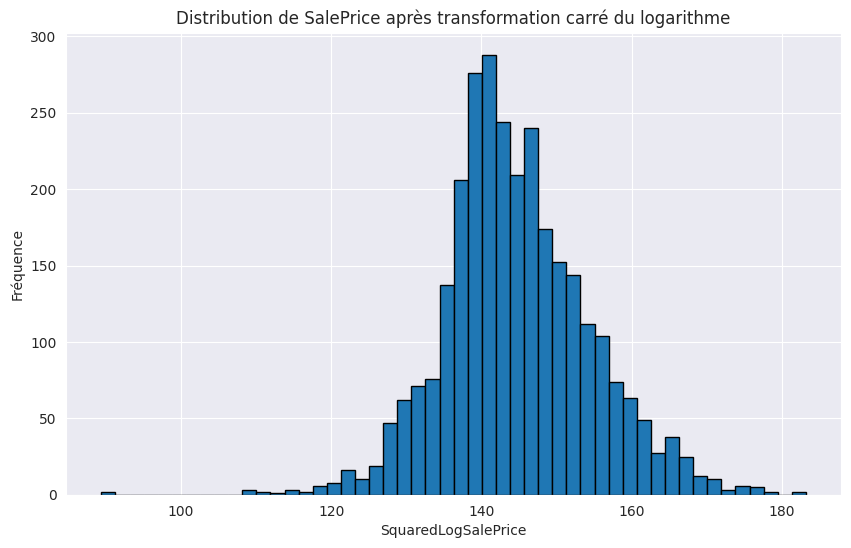

In [54]:
plt.figure(figsize=(10, 6))
plt.hist(df['SquaredLogSalePrice'], bins=50, edgecolor='k')
plt.xlabel('SquaredLogSalePrice')
plt.ylabel('Fréquence')
plt.title('Distribution de SalePrice après transformation carré du logarithme')
plt.show()


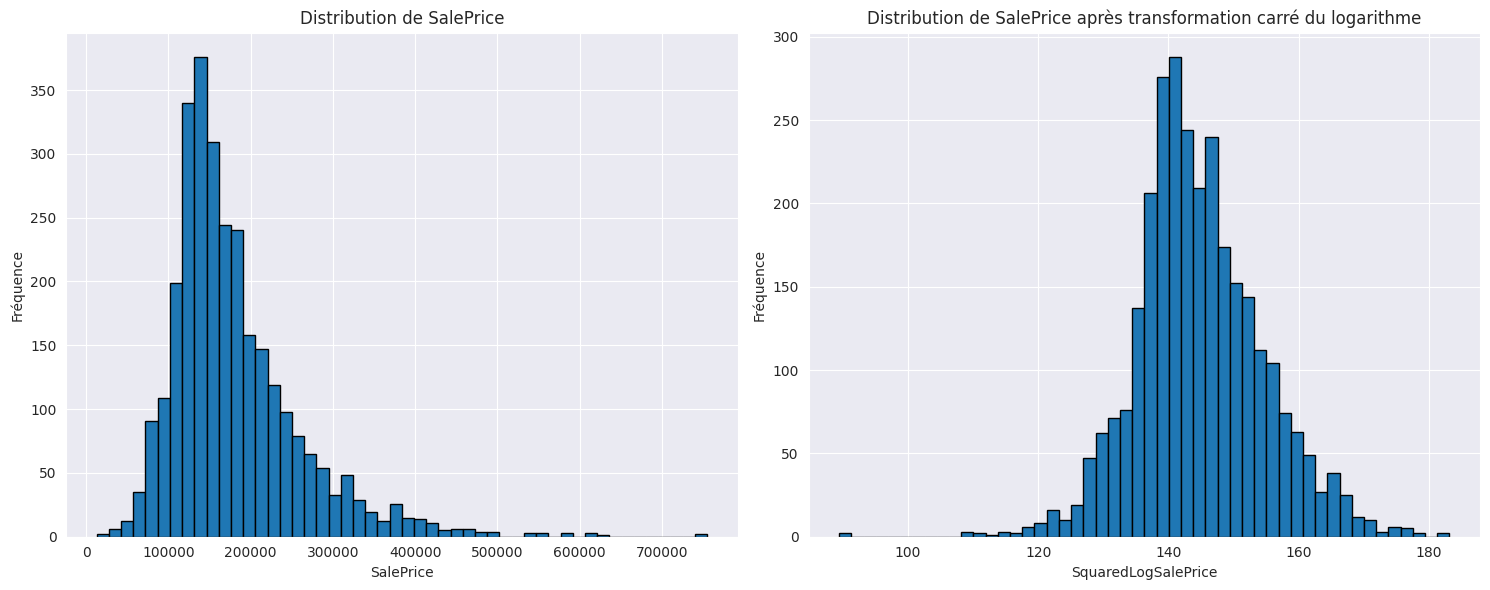

In [55]:
plt.figure(figsize=(15, 6))

# Distribution d'origine
plt.subplot(1, 2, 1)
plt.hist(df['SalePrice'], bins=50, edgecolor='k')
plt.xlabel('SalePrice')
plt.ylabel('Fréquence')
plt.title('Distribution de SalePrice')

# Distribution après transformation carré du logarithme
plt.subplot(1, 2, 2)
plt.hist(df['SquaredLogSalePrice'], bins=50, edgecolor='k')
plt.xlabel('SquaredLogSalePrice')
plt.ylabel('Fréquence')
plt.title('Distribution de SalePrice après transformation carré du logarithme')

plt.tight_layout()
plt.show()


In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pingouin as pg

# Chargez vos données dans un DataFrame pandas (supposons que votre DataFrame s'appelle "df")
# Remplacez "chemin_vers_votre_fichier.csv" par le chemin d'accès à votre fichier contenant les données

# Effectuez le test de normalité avant le logarithme
shapiro_result = pg.normality(df['SalePrice'])
print(f"Avant le logarithme - Test de normalité de D'Agostino et Pearson :\n{shapiro_result}")

# Appliquez le logarithme sur la colonne "SalePrice"
df['LogSalePrice'] = np.log(df['SalePrice'])

# Effectuez le test de normalité après le logarithme
shapiro_result_log = pg.normality(df['LogSalePrice'])
print(f"Après le logarithme - Test de normalité de D'Agostino et Pearson :\n{shapiro_result_log}")




Avant le logarithme - Test de normalité de D'Agostino et Pearson :
                  W          pval  normal
SalePrice  0.876261  2.340168e-43   False
Après le logarithme - Test de normalité de D'Agostino et Pearson :
                     W          pval  normal
LogSalePrice  0.985789  1.466418e-16   False


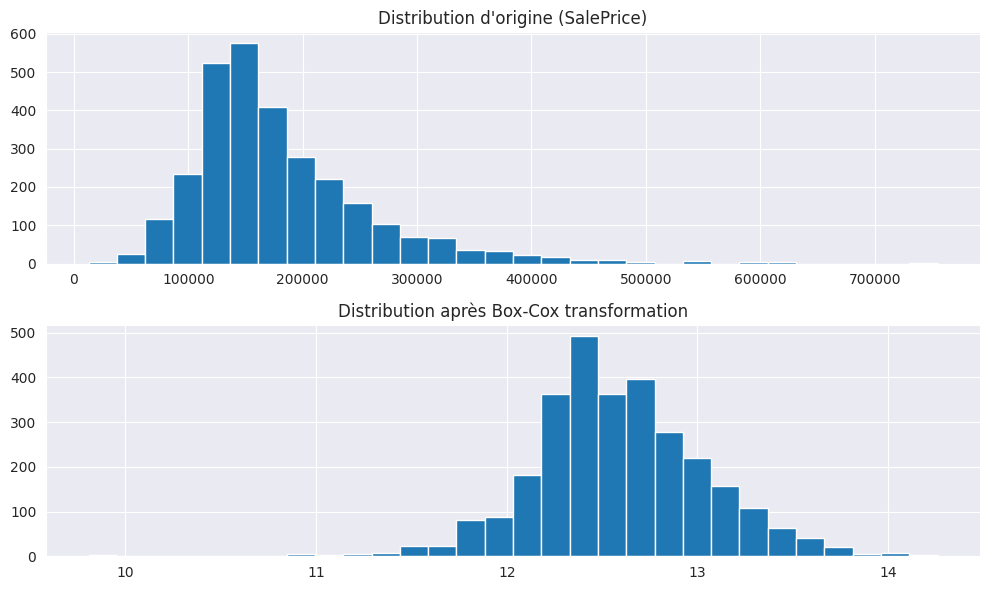

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import boxcox



# Appliquez la transformation de Box-Cox sur la colonne "SalePrice"
df['BoxCox_SalePrice'], lambda_val = boxcox(df['SalePrice'])

# Effectuez la transformation inverse de Box-Cox pour obtenir les valeurs d'origine
df['Backtransform_SalePrice'] = (np.power((lambda_val * df['BoxCox_SalePrice'] + 1), 1 / lambda_val))

# Visualisez les distributions avant et après la transformation de Box-Cox
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.hist(df['SalePrice'], bins=30)
plt.title('Distribution d\'origine (SalePrice)')
plt.subplot(2, 1, 2)
plt.hist(df['BoxCox_SalePrice'], bins=30)
plt.title('Distribution après Box-Cox transformation')
plt.tight_layout()
plt.show()


In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pingouin as pg
from scipy.stats import boxcox



# Appliquez la transformation de Box-Cox sur la colonne "SalePrice"
df['BoxCox_SalePrice'], lambda_val = boxcox(df['SalePrice'])

# Effectuez le test de normalité avant le logarithme
shapiro_result = pg.normality(df['SalePrice'])
print(f"Avant le logarithme - Test de normalité de D'Agostino et Pearson :\n{shapiro_result}")

# Effectuez le test de normalité après le logarithme
shapiro_result_log = pg.normality(df['LogSalePrice'])
print(f"Après le logarithme - Test de normalité de D'Agostino et Pearson :\n{shapiro_result_log}")

# Effectuez le test de normalité après la transformation de Box-Cox
shapiro_result_boxcox = pg.normality(df['BoxCox_SalePrice'])
print(f"Après la transformation de Box-Cox - Test de normalité de D'Agostino et Pearson :\n{shapiro_result_boxcox}")


Avant le logarithme - Test de normalité de D'Agostino et Pearson :
                  W          pval  normal
SalePrice  0.876261  2.340168e-43   False
Après le logarithme - Test de normalité de D'Agostino et Pearson :
                     W          pval  normal
LogSalePrice  0.985789  1.466418e-16   False
Après la transformation de Box-Cox - Test de normalité de D'Agostino et Pearson :
                         W          pval  normal
BoxCox_SalePrice  0.985897  1.725576e-16   False


In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pingouin as pg
from sklearn.preprocessing import MinMaxScaler, StandardScaler


# Mise à l'échelle Min-Max
minmax_scaler = MinMaxScaler()
df['Minmax_SalePrice'] = minmax_scaler.fit_transform(df['SalePrice'].values.reshape(-1, 1))

# Standardisation (z-score)
standard_scaler = StandardScaler()
df['Standardized_SalePrice'] = standard_scaler.fit_transform(df['SalePrice'].values.reshape(-1, 1))

# Effectuez le test de normalité après la mise à l'échelle Min-Max
shapiro_minmax = pg.normality(df['Minmax_SalePrice'])
print(f"Après mise à l'échelle Min-Max - Test de normalité de D'Agostino et Pearson :\n{shapiro_minmax}")

# Effectuez le test de normalité après la standardisation (z-score)
shapiro_standardized = pg.normality(df['Standardized_SalePrice'])
print(f"Après standardisation - Test de normalité de D'Agostino et Pearson :\n{shapiro_standardized}")


Après mise à l'échelle Min-Max - Test de normalité de D'Agostino et Pearson :
                         W          pval  normal
Minmax_SalePrice  0.876261  2.340168e-43   False
Après standardisation - Test de normalité de D'Agostino et Pearson :
                               W          pval  normal
Standardized_SalePrice  0.876261  2.340168e-43   False


In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pingouin as pg
from sklearn.preprocessing import QuantileTransformer


# Appliquez le Quantile Transformer sur la colonne "SalePrice"
quantile_transformer = QuantileTransformer(n_quantiles=len(df), output_distribution='normal')
df['Quantile_Transformed_SalePrice'] = quantile_transformer.fit_transform(df['SalePrice'].values.reshape(-1, 1))

# Effectuez le test de normalité après le Quantile Transformer
shapiro_quantile = pg.normality(df['Quantile_Transformed_SalePrice'])
print(f"Après le Quantile Transformer - Test de normalité de D'Agostino et Pearson :\n{shapiro_quantile}")


Après le Quantile Transformer - Test de normalité de D'Agostino et Pearson :
                                       W      pval  normal
Quantile_Transformed_SalePrice  0.998572  0.012175   False


In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pingouin as pg
from sklearn.preprocessing import PowerTransformer



# Appliquez le Power Transformer sur la colonne "SalePrice"
power_transformer = PowerTransformer(method='yeo-johnson')
df['Power_Transformed_SalePrice'] = power_transformer.fit_transform(df['SalePrice'].values.reshape(-1, 1))

# Effectuez le test de normalité après le Power Transformer
shapiro_power = pg.normality(df['Power_Transformed_SalePrice'])
print(f"Après le Power Transformer - Test de normalité de D'Agostino et Pearson :\n{shapiro_power}")


Après le Power Transformer - Test de normalité de D'Agostino et Pearson :
                                    W          pval  normal
Power_Transformed_SalePrice  0.985897  1.726257e-16   False


In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pingouin as pg
from sklearn.preprocessing import KBinsDiscretizer



# Appliquez la méthode du binning (discrétisation) sur la colonne "SalePrice"
n_bins = 13  # Vous pouvez ajuster le nombre de bins en fonction de votre préférence
binning = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
df['Binned_SalePrice'] = binning.fit_transform(df['SalePrice'].values.reshape(-1, 1))

# Effectuez le test de normalité après le binning
shapiro_binned = pg.normality(df['Binned_SalePrice'])
print(f"Après le binning - Test de normalité de D'Agostino et Pearson :\n{shapiro_binned}")


Après le binning - Test de normalité de D'Agostino et Pearson :
                         W  pval  normal
Binned_SalePrice  0.841702   0.0   False


/home/apprenant/.local/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pingouin as pg



# Appliquez la transformation de rang sur la colonne "SalePrice"
df['Rank_SalePrice'] = df['SalePrice'].rank()

# Effectuez le test de normalité après la transformation de rang
shapiro_rank = pg.normality(df['Rank_SalePrice'])
print(f"Après la transformation de rang - Test de normalité de D'Agostino et Pearson :\n{shapiro_rank}")


Après la transformation de rang - Test de normalité de D'Agostino et Pearson :
                       W          pval  normal
Rank_SalePrice  0.954874  3.371720e-29   False


In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pingouin as pg
from sklearn.preprocessing import QuantileTransformer



# Supprimez les valeurs avec un coût supérieur à 50,000 de la colonne "SalePrice"
df = df[df['SalePrice'] <= 50000]

# Appliquez la transformation logarithmique sur la colonne "SalePrice"
df['Log_SalePrice'] = np.log(df['SalePrice'])

# Appliquez la transformation de Box-Cox sur la colonne "SalePrice"
from scipy.stats import boxcox
df['BoxCox_SalePrice'], _ = boxcox(df['SalePrice'])

# Appliquez la mise à l'échelle Min-Max sur la colonne "SalePrice"
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()
df['MinMax_SalePrice'] = minmax_scaler.fit_transform(df['SalePrice'].values.reshape(-1, 1))

# Appliquez la standardisation (z-score) sur la colonne "SalePrice"
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
df['Standardized_SalePrice'] = standard_scaler.fit_transform(df['SalePrice'].values.reshape(-1, 1))

# Appliquez la transformation quantile sur la colonne "SalePrice"
quantile_transformer = QuantileTransformer(n_quantiles=len(df), output_distribution='normal')
df['Quantile_Transformed_SalePrice'] = quantile_transformer.fit_transform(df['SalePrice'].values.reshape(-1, 1))

# Appliquez la transformation de puissance sur la colonne "SalePrice"
from sklearn.preprocessing import PowerTransformer
power_transformer = PowerTransformer(method='yeo-johnson')
df['Power_Transformed_SalePrice'] = power_transformer.fit_transform(df['SalePrice'].values.reshape(-1, 1))

# Appliquez la transformation de rang sur la colonne "SalePrice"
df['Rank_SalePrice'] = df['SalePrice'].rank()

# Effectuez le test de normalité après chaque transformation
shapiro_log = pg.normality(df['Log_SalePrice'])
shapiro_boxcox = pg.normality(df['BoxCox_SalePrice'])
shapiro_minmax = pg.normality(df['MinMax_SalePrice'])
shapiro_standardized = pg.normality(df['Standardized_SalePrice'])
shapiro_quantile = pg.normality(df['Quantile_Transformed_SalePrice'])
shapiro_power = pg.normality(df['Power_Transformed_SalePrice'])
shapiro_rank = pg.normality(df['Rank_SalePrice'])

print("Après les différentes transformations - Test de normalité de D'Agostino et Pearson :")
print(f"Logarithme : {shapiro_log}")
print(f"Box-Cox : {shapiro_boxcox}")
print(f"Mise à l'échelle Min-Max : {shapiro_minmax}")
print(f"Standardisation : {shapiro_standardized}")
print(f"Quantile Transformer : {shapiro_quantile}")
print(f"Power Transformer : {shapiro_power}")
print(f"Transformation de rang : {shapiro_rank}")


Après les différentes transformations - Test de normalité de D'Agostino et Pearson :
Logarithme :                      W      pval  normal
Log_SalePrice  0.70312  0.000903   False
Box-Cox :                          W      pval  normal
BoxCox_SalePrice  0.935505  0.442118    True
Mise à l'échelle Min-Max :                          W      pval  normal
MinMax_SalePrice  0.826125  0.018856   False
Standardisation :                                W      pval  normal
Standardized_SalePrice  0.826125  0.018856   False
Quantile Transformer :                                        W      pval  normal
Quantile_Transformed_SalePrice  0.876827  0.079826    True
Power Transformer :                                     W     pval  normal
Power_Transformed_SalePrice  0.935506  0.44213    True
Transformation de rang :                        W     pval  normal
Rank_SalePrice  0.966896  0.87573    True


/tmp/ipykernel_80976/2162631592.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Log_SalePrice'] = np.log(df['SalePrice'])
/tmp/ipykernel_80976/2162631592.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BoxCox_SalePrice'], _ = boxcox(df['SalePrice'])
/tmp/ipykernel_80976/2162631592.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd